<a href="https://colab.research.google.com/github/mhtasnia/DS424/blob/main/DS424_Understanding_Image_histogram%26equalization_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import numpy as np
image_1 = cv2.imread('/content/drive/MyDrive/img.jpg', cv2.IMREAD_GRAYSCALE)
unique_gray_levels = np.unique(image_1)
print(f"The number of unique gray levels in the image is: {len(unique_gray_levels)}")


The number of unique gray levels in the image is: 256


In [4]:
len(unique_gray_levels)

256

## plot histogram of image

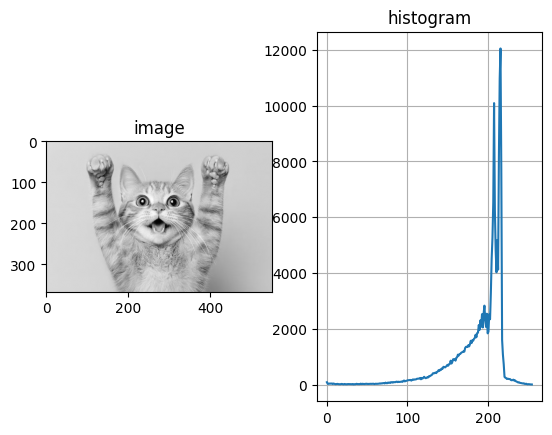

In [7]:
plt.subplot(1,2,1)
plt.imshow(image_1,cmap='gray')
plt.title('image')
plt.subplot(1,2,2)
hist,bins=np.histogram(image_1.ravel(),256,[0,256])
plt.plot(hist)
plt.title('histogram')
plt.grid(True)
plt.show()

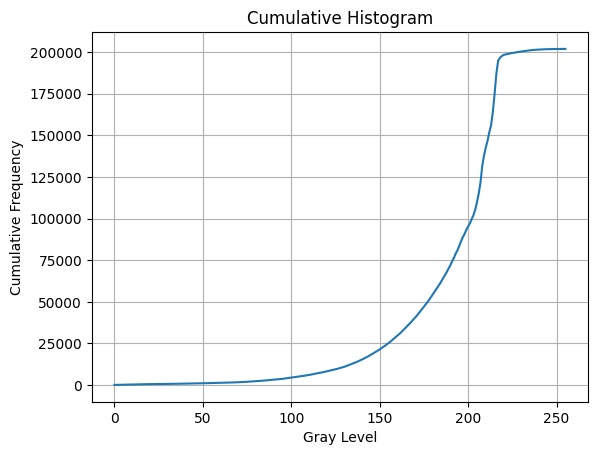

In [8]:
hist, bins = np.histogram(image_1.ravel(), 256, [0, 256])
cumulative_hist = np.cumsum(hist)
plt.plot(cumulative_hist)
plt.xlabel('Gray Level')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative Histogram')
plt.grid(True)
plt.show()

# **Shifting**

In [12]:
image_1_shifted = np.clip(image_1 - 100, 0, 255).astype(np.uint8)

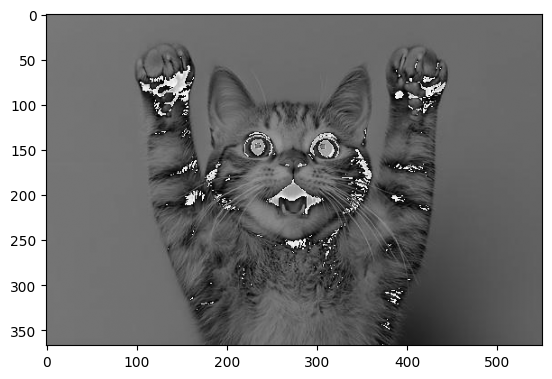

In [13]:
plt.imshow(image_1_shifted,cmap='gray')
plt.axis(False)

In [15]:
unique_gray_levels_shifted = np.unique(image_1_shifted)

print(f"The number of unique gray levels in the image is: {len(unique_gray_levels_shifted)}")

The number of unique gray levels in the image is: 256


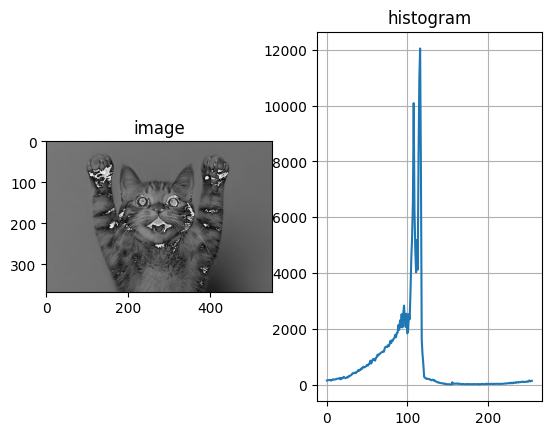

In [17]:
plt.subplot(1,2,1)
plt.imshow(image_1_shifted,cmap='gray')
plt.title('image')
plt.subplot(1,2,2)
hist,bins=np.histogram(image_1_shifted.ravel(),256,[0,256])
plt.plot(hist)
plt.title('histogram')
plt.grid(True)
plt.show()

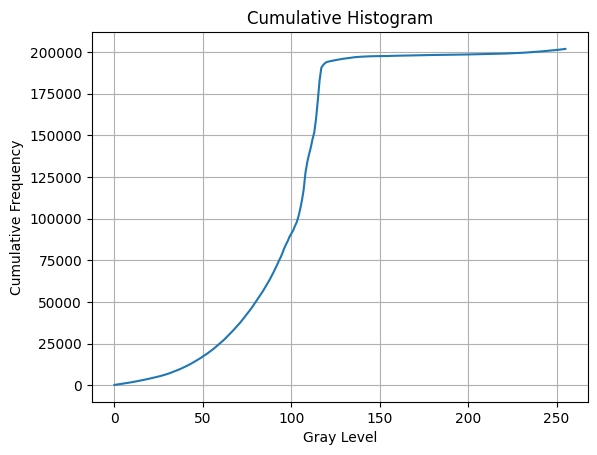

In [18]:
hist, bins = np.histogram(image_1_shifted.ravel(), 256, [0, 256])
cumulative_hist = np.cumsum(hist)
plt.plot(cumulative_hist)
plt.xlabel('Gray Level')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative Histogram')
plt.grid(True)
plt.show()

# Equalization

(np.float64(-0.5), np.float64(549.5), np.float64(366.5), np.float64(-0.5))

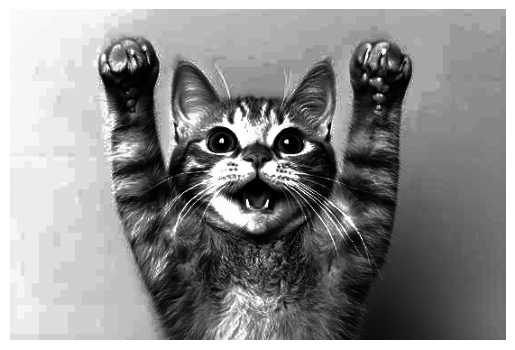

In [19]:
equ = cv2.equalizeHist(image_1)
plt.imshow(equ,cmap='gray')
plt.axis('off')

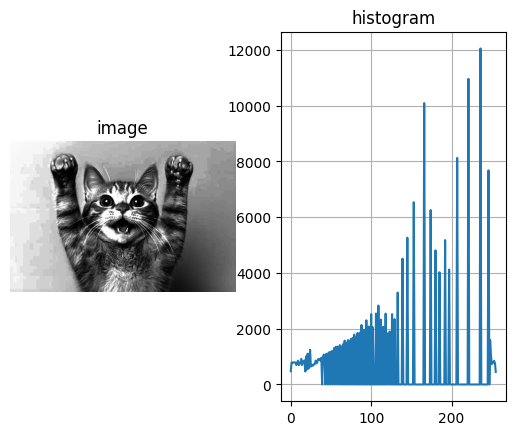

In [21]:
plt.subplot(1,2,1)
plt.imshow(equ,cmap='gray')
plt.title('image')
plt.axis('off')
plt.subplot(1,2,2)
hist,bins=np.histogram(equ.ravel(),256,[0,256])
plt.plot(hist)
plt.title('histogram')
plt.grid(True)
plt.show()

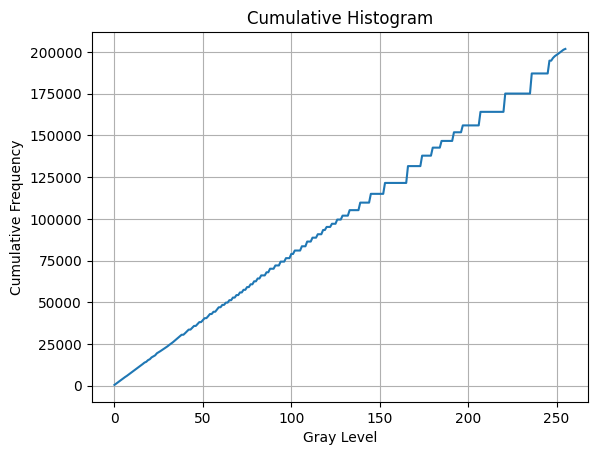

In [22]:
hist, bins = np.histogram(equ.ravel(), 256, [0, 256])
cumulative_hist = np.cumsum(hist)
plt.plot(cumulative_hist)
plt.xlabel('Gray Level')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative Histogram')
plt.grid(True)
plt.show()

# Equalization for shifted image

(np.float64(-0.5), np.float64(549.5), np.float64(366.5), np.float64(-0.5))

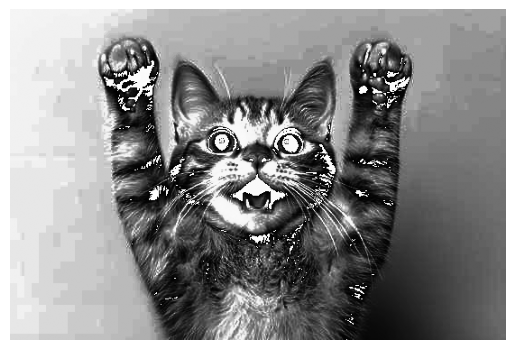

In [25]:
equ_shifted = cv2.equalizeHist(image_1_shifted)
plt.imshow(equ_shifted,cmap='gray')
plt.axis('off')

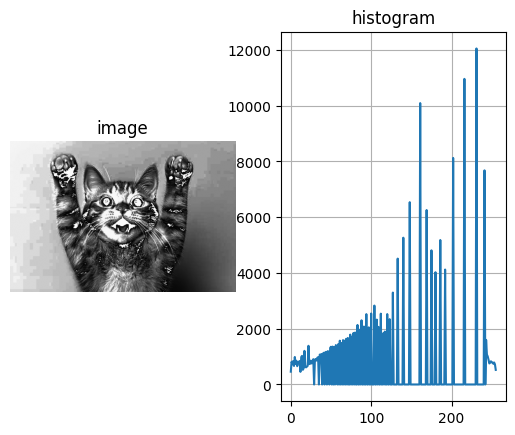

In [28]:
plt.subplot(1,2,1)
plt.imshow(equ_shifted,cmap='gray')
plt.title('image')
plt.axis('off')
plt.subplot(1,2,2)
hist,bins=np.histogram(equ_shifted.ravel(),256,[0,256])
plt.plot(hist)
plt.title('histogram')
plt.grid(True)
plt.show()

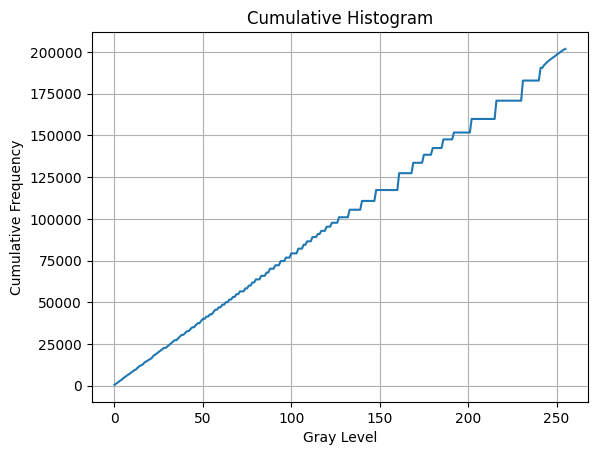

In [27]:
hist, bins = np.histogram(equ_shifted.ravel(), 256, [0, 256])
cumulative_hist = np.cumsum(hist)
plt.plot(cumulative_hist)
plt.xlabel('Gray Level')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative Histogram')
plt.grid(True)
plt.show()

# **contrast stretching**

In [29]:
try_low_level_range_images=cv2.imread('/content/drive/MyDrive/img3.jpg',0)

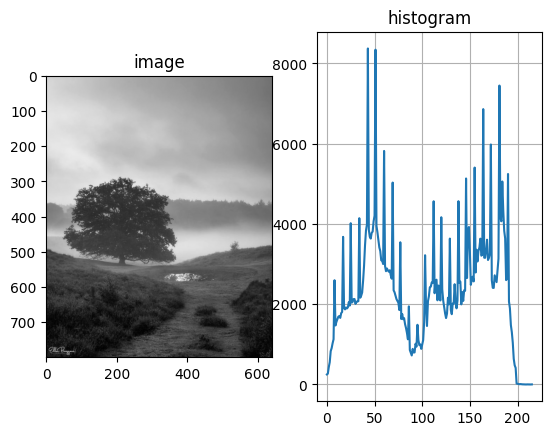

In [30]:
plt.subplot(1,2,1)
plt.imshow(try_low_level_range_images,cmap='gray')
plt.title('image')
plt.subplot(1,2,2)
hist,bins=np.histogram(try_low_level_range_images.ravel(),216)
plt.plot(hist)
plt.title('histogram')
plt.grid(True)
plt.show()
#from 50 to 80 nearly equal

# **$$s = \frac{r - r_{\min}}{r_{\max} - r_{\min}} \times 255$$**

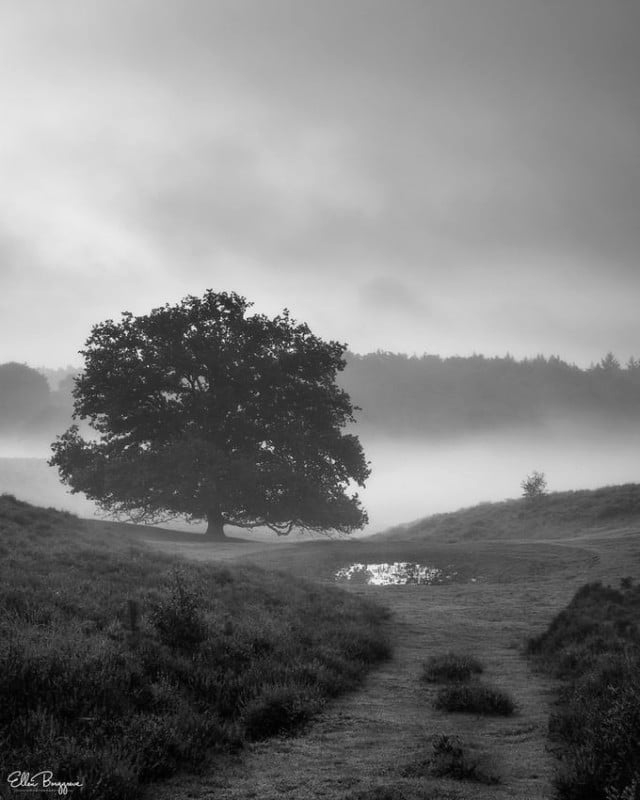

In [31]:
min_value = np.min(try_low_level_range_images)
max_value = np.max(try_low_level_range_images)
image_new = (try_low_level_range_images - min_value) * (255 / (max_value - min_value))
# image_new=(try_low_level_range_images-np.min(try_low_level_range_images))*((255-0)/(np.max(try_low_level_range_images)-np.min(try_low_level_range_images)))
cv2_imshow(image_new)

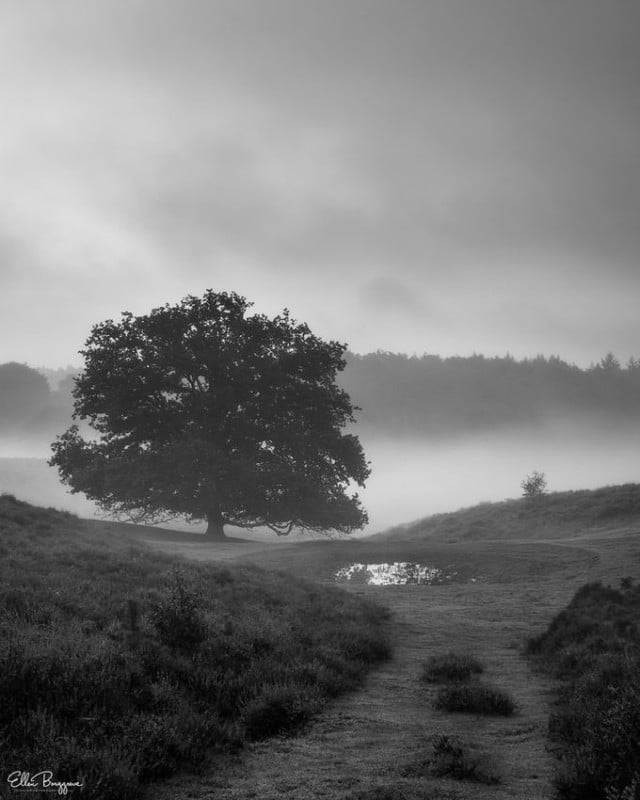

In [32]:
cv2_imshow(try_low_level_range_images)

Text(0.5, 1.0, 'original image')

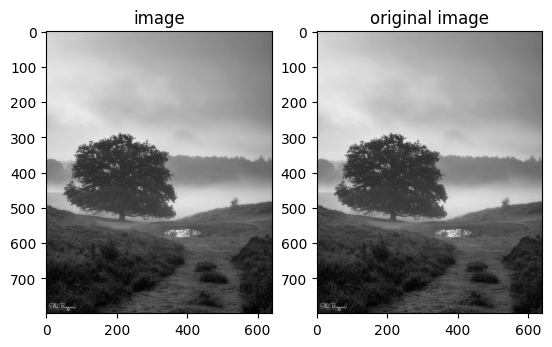

In [36]:
plt.subplot(1,2,1)
plt.imshow(image_new,cmap='gray')
plt.title('image')
plt.subplot(1,2,2)
plt.imshow(try_low_level_range_images,cmap='gray')
plt.title('original image')

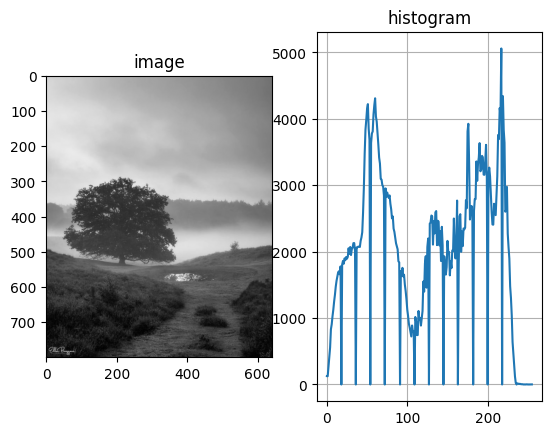

In [33]:
plt.subplot(1,2,1)
plt.imshow(image_new,cmap='gray')
plt.title('image')
plt.subplot(1,2,2)
hist,bins=np.histogram(image_new.ravel(),256,[0,256])
plt.plot(hist)
plt.title('histogram')
plt.grid(True)
plt.show()

In [37]:
try_low_level_range_images.min()


np.uint8(0)

In [38]:
image_new.min()

np.float64(0.0)

In [39]:
try_low_level_range_images.max(),image_new.max()

(np.uint8(241), np.float64(255.0))